##### 1. Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Loading the Dataset

In [3]:
df = pd.read_csv("reviews.csv")

##### 3. Understanding the Dataset

In [4]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

In [5]:
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [6]:
df.tail()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13
2513,2514,1099793,Venmo,Education,"Latest update broke some features, please fix ...",it,2.1,2025-03-04 02:51:17,True,Android,1040,26.0,Bangladesh,Prefer not to say,2.2


In [7]:
df.shape

(2514, 15)

##### 4. Data Cleaning

 1. Check for Duplicates

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2509    False
2510    False
2511    False
2512    False
2513    False
Length: 2514, dtype: bool

In [9]:
df.duplicated().any()

False

In [10]:
df['user_id'].duplicated().any()

False

*Conclusion:- There are no duplicate values*

2. Check for Missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [12]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [13]:
df['review_text'] = df['review_text'].fillna('No Review')

In [14]:
df['rating'].describe()


count    2477.000000
mean        3.021034
std         1.149955
min         1.000000
25%         2.100000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [15]:
# Fill with average rating of the same app
df['rating'] = df.groupby('app_name')['rating'].transform(lambda x: x.fillna(x.mean()))


In [16]:
df['user_country'] = df['user_country'].fillna("Unknown")

In [17]:
df['user_gender'].unique()

array(['Female', 'Male', 'Prefer not to say', 'Non-binary', nan],
      dtype=object)

In [18]:
df['user_gender'] = df['user_gender'].fillna('Prefer not to say')

In [19]:
df['app_version']=df['app_version'].fillna('Unknown')

In [20]:
df.isnull().sum()

review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
user_gender          0
app_version          0
dtype: int64

##### 5. Data Transformation/Feature Engineering

In [21]:
df['user_age']=df['user_age'].astype(int)

In [22]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [23]:
df['age_cat'] = pd.cut(df['user_age'],bins=[0,17,24,35,55,100],labels=['Children','Teen','Adult','Seniors','Super Seniors'])

In [24]:
lang_dict = {
    'no': 'Norwegian',
    'ru': 'Russian',
    'es': 'Spanish',
    'vi': 'Vietnamese',
    'tl': 'Tagalog (Filipino)',
    'th': 'Thai',
    'da': 'Danish',
    'ja': 'Japanese',
    'ms': 'Malay',
    'fr': 'French',
    'it': 'Italian',
    'nl': 'Dutch',
    'hi': 'Hindi',
    'ar': 'Arabic',
    'zh': 'Chinese',
    'id': 'Indonesian',
    'pl': 'Polish',
    'ko': 'Korean',
    'sv': 'Swedish',
    'pt': 'Portuguese',
    'tr': 'Turkish',
    'fi': 'Finnish',
    'de': 'German',
    'en': 'English'
}

df['review_language'] = df['review_language'].map(lang_dict)


In [25]:
df['review_language'] = df['review_language'].replace({'en':'English',})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   review_id          2514 non-null   int64         
 1   user_id            2514 non-null   int64         
 2   app_name           2514 non-null   object        
 3   app_category       2514 non-null   object        
 4   review_text        2514 non-null   object        
 5   review_language    2514 non-null   object        
 6   rating             2514 non-null   float64       
 7   review_date        2514 non-null   datetime64[ns]
 8   verified_purchase  2514 non-null   bool          
 9   device_type        2514 non-null   object        
 10  num_helpful_votes  2514 non-null   int64         
 11  user_age           2514 non-null   int32         
 12  user_country       2514 non-null   object        
 13  user_gender        2514 non-null   object        
 14  app_vers

### 6. EDA (Exploratory Data Analysis)

1. Which factors do you think most strongly influence the rating of an app? Why?
2. How might review_language affect the interpretation of user satisfaction?
3. Explain how app_version and review_date together can show app improvement or decline.
4. Do you think verified_purchase makes reviews more trustworthy? Justify your answer.
5. How would you test whether device_type has an impact on app ratings?
6. If you had to find which age group is most satisfied, what steps would you follow?
7. How would you identify fake or unreliable reviews using num_helpful_votes and review_text?

In [27]:
df.corr(numeric_only = True)

,review_id,user_id,rating,verified_purchase,num_helpful_votes,user_age
review_id,1.000000,-0.010945,0.009377,0.016785,0.026026,0.000517
user_id,-0.010945,1.000000,-0.001697,-0.002799,-0.026070,-0.007048
rating,0.009377,-0.001697,1.000000,0.017241,0.009182,0.017301
verified_purchase,0.016785,-0.002799,0.017241,1.000000,0.015364,-0.006316
num_helpful_votes,0.026026,-0.026070,0.009182,0.015364,1.000000,-0.009778
user_age,0.000517,-0.007048,0.017301,-0.006316,-0.009778,1.000000


### 1. Which factors do you think most strongly influence the rating of an app? Why?

Step 1: Does app category affect rating?

In [28]:
df.groupby('app_category')['rating'].mean().sort_values(ascending=False)


app_category
Health & Fitness           3.250470
Navigation                 3.107453
Entertainment              3.098795
Utilities                  3.082780
Games                      3.065878
Video Players & Editors    3.064748
Photography                3.045451
Business                   3.044799
Music & Audio              3.019675
Social Networking          3.014388
Education                  3.009388
Communication              2.993228
Shopping                   2.979763
Finance                    2.974219
Productivity               2.967281
News & Magazines           2.925687
Dating                     2.878772
Travel & Local             2.841922
Name: rating, dtype: float64

*Observation:- Health and Fitness have the Higher Average Rating & Travel and Local have the lower average rating*

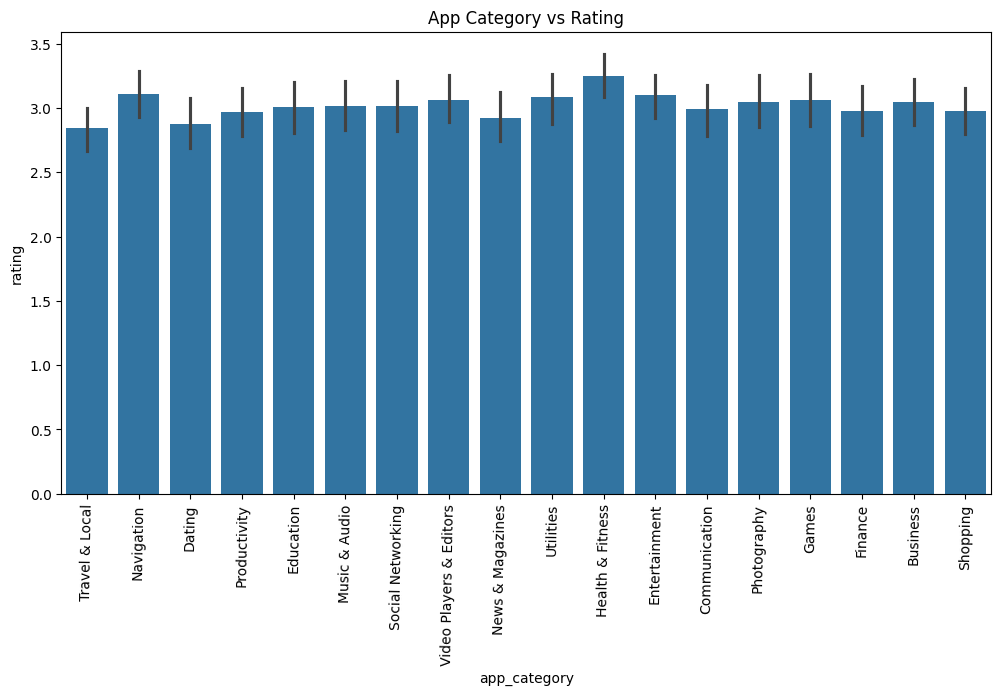

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x='app_category', y='rating', data=df)
plt.xticks(rotation=89)
plt.title('App Category vs Rating')
plt.show()

Step 2: Does app version affect rating?

In [30]:
df.groupby('app_version')['rating'].mean().sort_values(ascending=False)

app_version
10.1.78        5.0
v11.9.77       5.0
1.2.30         5.0
1.2.39         5.0
12.4.35.938    5.0
              ... 
2.1.14         1.0
1.4.26         1.0
v12.7.84       1.0
v7.8.57        1.0
10.4.99        1.0
Name: rating, Length: 2082, dtype: float64

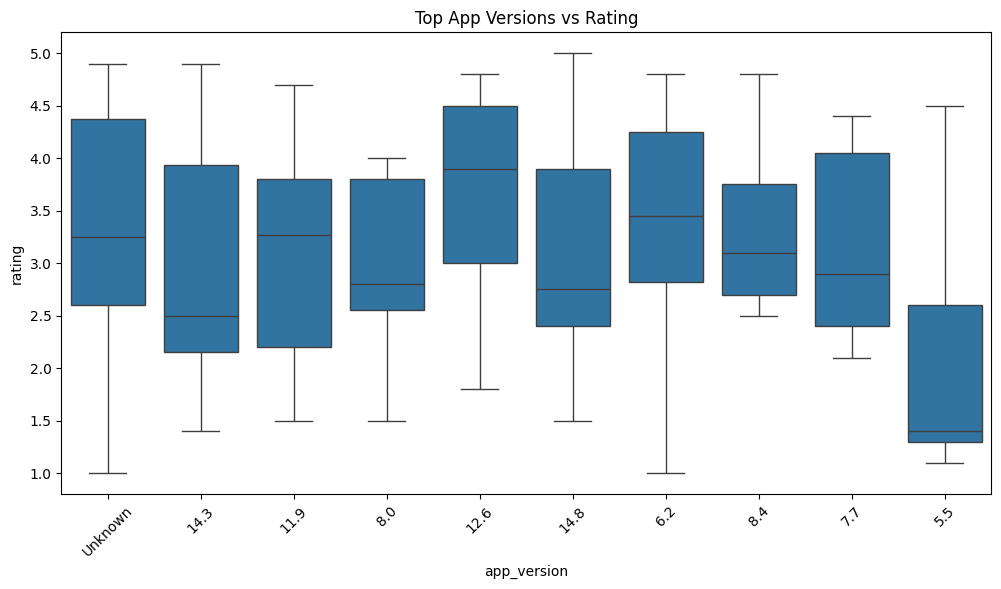

In [31]:
top_versions = df['app_version'].value_counts().head(10).index  # top 10 versions
plt.figure(figsize=(12,6))
sns.boxplot(x='app_version', y='rating', data=df[df['app_version'].isin(top_versions)])
plt.xticks(rotation=45)
plt.title('Top App Versions vs Rating')
plt.show()


Step 3: Does verified purchase matter?

In [32]:
df.groupby('verified_purchase')['rating'].mean()


verified_purchase
False    2.985035
True     3.031885
Name: rating, dtype: float64

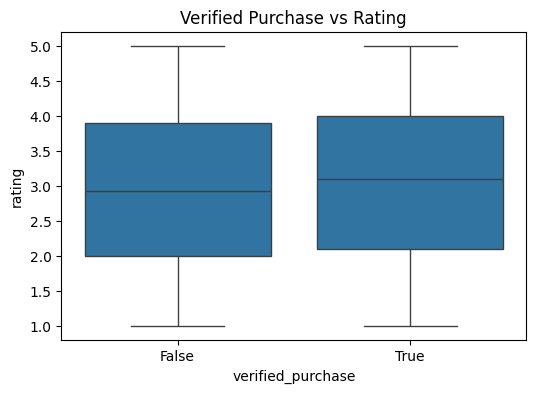

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x='verified_purchase', y='rating', data=df)
plt.title('Verified Purchase vs Rating')
plt.show()


*Observation: Verified users may rate more honestly → slightly higher or lower ratings.*

Step 4: Does user country affect rating?

In [34]:
df.groupby('user_country')['rating'].mean().sort_values(ascending=False).head(10)


user_country
Unknown          3.263415
Thailand         3.223284
Brazil           3.215471
France           3.214687
Turkey           3.112174
South Korea      3.109574
United States    3.101239
India            3.088991
Russia           3.078255
Vietnam          3.051504
Name: rating, dtype: float64

*Observation: While there are slight variations in average ratings by country, overall ratings are fairly consistent across countries in this dataset.*

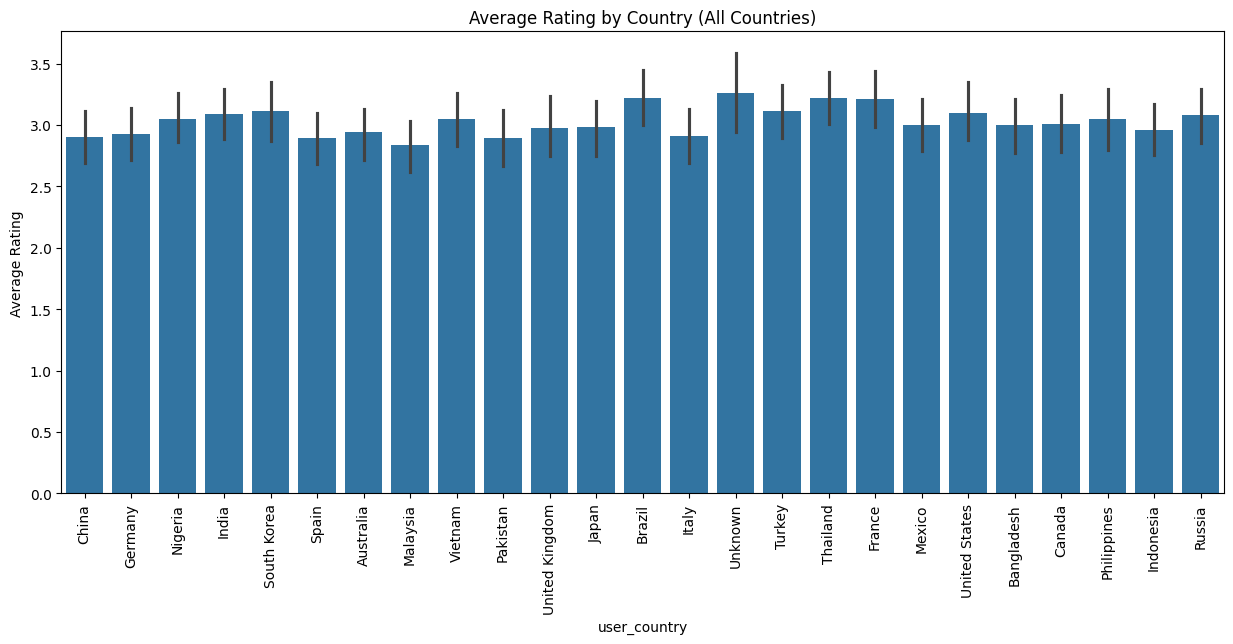

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x='user_country', y='rating', data=df, estimator='mean')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating by Country (All Countries)')
plt.show()

Step 5: Does device type matter?

In [36]:
df.groupby('device_type')['rating'].mean().sort_values(ascending=False)

device_type
Android Tablet    3.066371
iOS               3.062071
iPad              3.036127
Windows Phone     2.980320
Android           2.964278
Name: rating, dtype: float64

*Android Tablet users gave the highest average rating (3.066), followed closely by iOS users (3.062).*

*iPad users gave an average rating of 3.036, slightly lower than Android Tablets and iOS.*

*Windows Phone (2.980) and Android phones (2.964) users gave the lowest average ratings.*

*The difference between the highest and lowest average ratings across device types is about 0.10, indicating only a small variation.*

*Conclusion: Device type has a minor influence on app ratings in this dataset, with tablets and iOS devices slightly rating apps higher than* *Android phones or Windows Phones.*

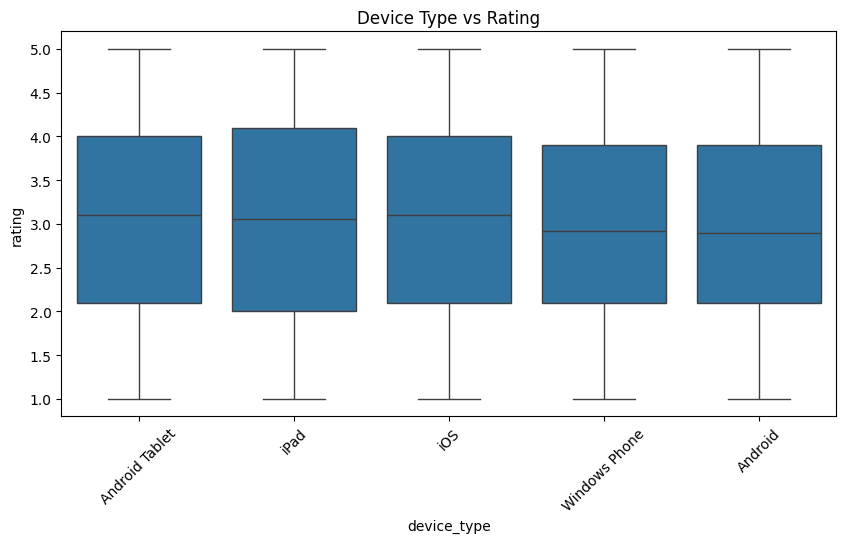

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='device_type', y='rating', data=df)
plt.xticks(rotation=45)
plt.title('Device Type vs Rating')
plt.show()


Step 6: Does App name matter?

In [38]:
df.groupby('app_name')['rating'].mean().sort_values(ascending=False)


app_name
Snapchat            3.314286
OneDrive            3.294595
Khan Academy        3.267308
Uber                3.212698
Grammarly           3.204545
VLC                 3.146939
Spotify             3.136000
Discord             3.130952
WhatsApp            3.129310
Dropbox             3.118841
Lyft                3.090741
Google Drive        3.090541
Reddit              3.084810
Microsoft Office    3.064706
YouTube             3.062121
Amazon              3.059259
Telegram            3.058209
Bumble              3.051786
TikTok              3.028571
Venmo               3.022449
Instagram           3.019718
Canva               3.015789
Pinterest           3.007692
Signal              2.996429
eBay                2.985965
Netflix             2.985246
Duolingo            2.978182
MX Player           2.974286
Facebook            2.972549
Google Maps         2.958065
Airbnb              2.938095
Udemy               2.935294
Coursera            2.919298
LinkedIn            2.918868
Zoom 

*The highest average rating is for Snapchat (3.314), followed by OneDrive (3.295) and Khan Academy (3.267).*

*Apps like Tinder (2.713), Adobe Photoshop (2.790), and Twitter (2.802) have the lowest average ratings.*

*The difference between the highest and lowest rated apps is about 0.60, which is a significant variation.*

*Conclusion: Individual apps clearly influence ratings—some apps consistently get higher user satisfaction, while others score lower.*

*This shows that app-specific factors (features, usability, popularity) are important determinants of rating in this dataset.*

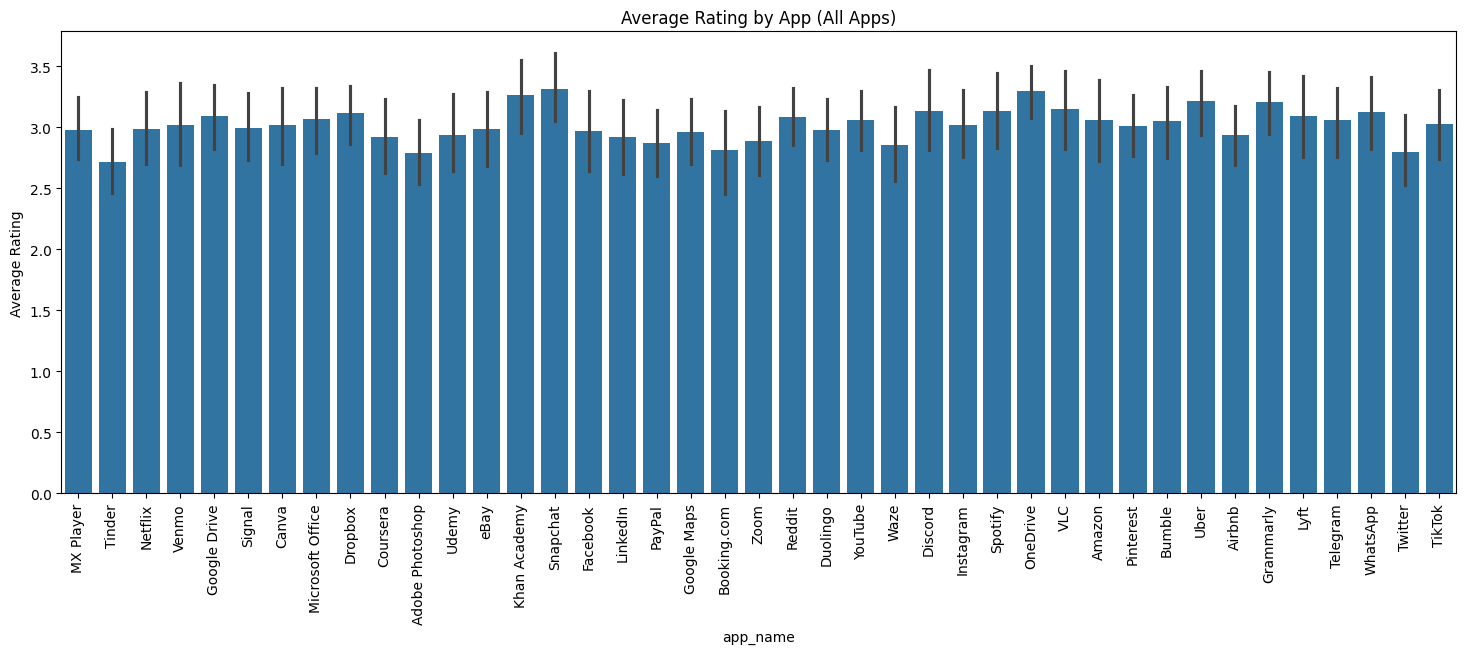

In [39]:
plt.figure(figsize=(18,6))
sns.barplot(x='app_name', y='rating', data=df, estimator='mean')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating by App (All Apps)')
plt.show()


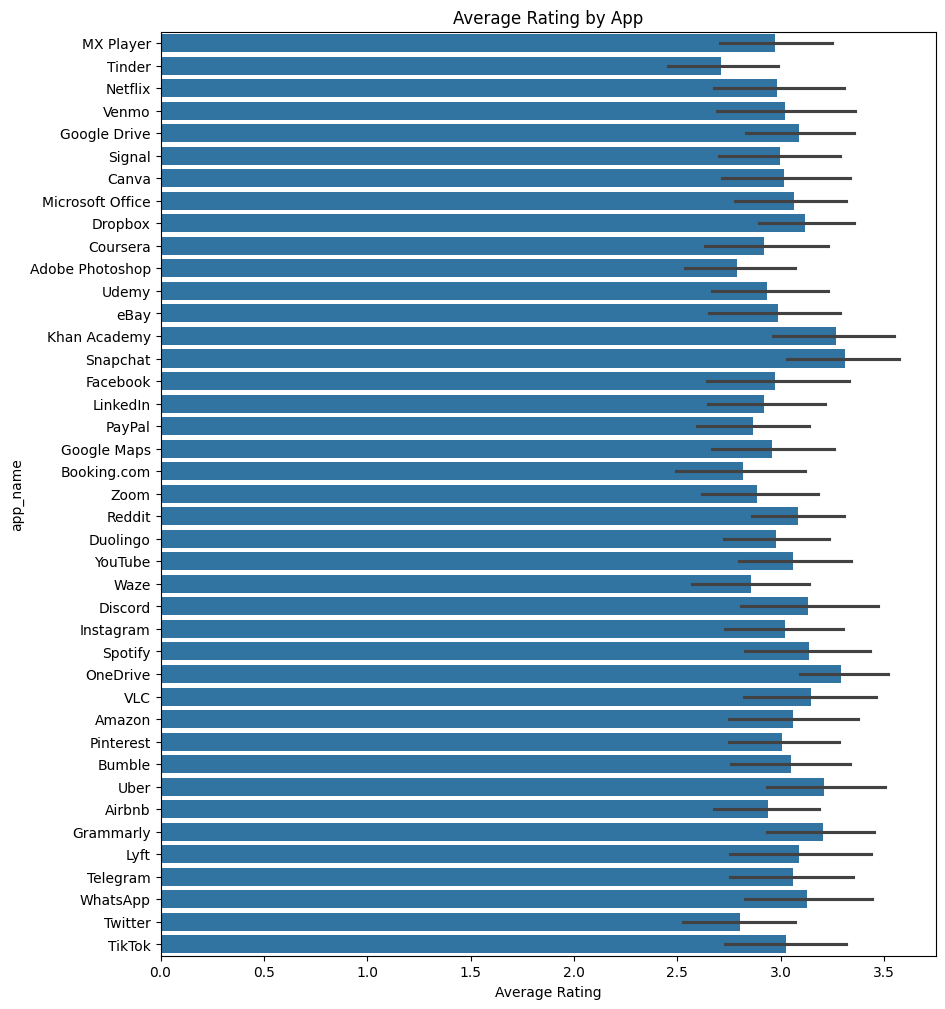

In [40]:
plt.figure(figsize=(10,12))
sns.barplot(x='rating', y='app_name', data=df, estimator='mean')
plt.xlabel('Average Rating')
plt.title('Average Rating by App')
plt.show()


### 2. How might review_language affect the interpretation of user satisfaction?

Step 1: Check how many reviews per language

In [41]:
df['review_language'].value_counts()


review_language
Russian               134
Polish                122
Spanish               119
Dutch                 116
Tagalog (Filipino)    114
Korean                114
Finnish               111
Indonesian            111
Arabic                108
Danish                105
Norwegian             103
German                102
Turkish               102
Swedish               102
Vietnamese            100
Italian               100
English                99
Chinese                98
Thai                   97
Japanese               94
Portuguese             93
Hindi                  92
French                 90
Malay                  88
Name: count, dtype: int64

*Most reviews come from Russian (134 reviews), followed by Polish (122) and Spanish (119).*

*Least reviews are in Malay (88), French (90), and Hindi (92).*

*The range of review counts is from 88 to 134, so the dataset has a relatively balanced distribution across languages.*

*Conclusion: No single language dominates excessively, but Russian, Polish, and Spanish reviews slightly outweigh others. This is important because **languages with fewer reviews (e.g., Malay, French, Hindi) may produce less reliable average ratings when interpreting user satisfaction.*

Step 2: Average rating per language

In [42]:
df.groupby('review_language')['rating'].mean().sort_values(ascending=False).round(3)


review_language
Danish                3.248
Spanish               3.197
French                3.174
Tagalog (Filipino)    3.120
Russian               3.116
Hindi                 3.113
Korean                3.076
Arabic                3.067
German                3.063
English               3.060
Vietnamese            3.050
Thai                  3.036
Italian               3.023
Norwegian             3.023
Finnish               2.986
Malay                 2.967
Dutch                 2.967
Indonesian            2.965
Swedish               2.927
Turkish               2.908
Japanese              2.880
Portuguese            2.847
Chinese               2.839
Polish                2.812
Name: rating, dtype: float64

*Highest-rated language is Danish (3.25), followed by Spanish (3.20) and French (3.17).*

*These users generally show higher satisfaction.*

*Lowest-rated language is Polish (2.81), followed by Chinese (2.84) and Portuguese (2.85).*

*These users are relatively less satisfied.*

*English reviews have an average rating of 3.06, which is close to the overall dataset mean (≈3.02) → English is a good neutral benchmark.*

*The variation between highest and lowest languages is around 0.44 points (3.25 – 2.81), showing moderate differences in satisfaction across languages.*

*Some languages with fewer reviews (e.g., Malay, Dutch, Indonesian) show slightly lower averages, but since their counts are smaller, these might not be very reliable.*

*Conclusion:* 
*User satisfaction does vary by language. Danish, Spanish, and French speakers rate apps higher, while Polish, Chinese, and Portuguese speakers *rate them lower. English stays close to the dataset average, making it a stable reference point.*

Step 3: Count of reviews vs average rating

In [43]:
lang_counts = df.groupby('review_language')['rating'].agg(['count', 'mean']).sort_values('mean', ascending=False)
lang_counts


,count,mean
review_language,,
Danish,105,3.247914
Spanish,119,3.196759
French,90,3.173543
Tagalog (Filipino),114,3.120341
Russian,134,3.116418
Hindi,92,3.113253
Korean,114,3.076316
Arabic,108,3.067195
German,102,3.063441


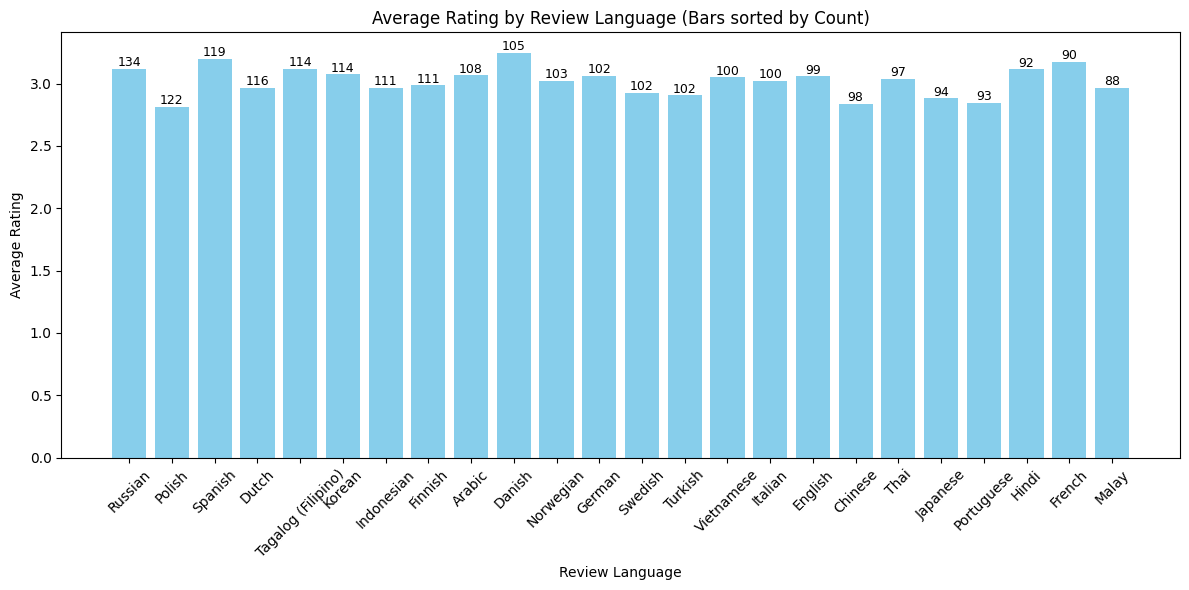

In [78]:
lang_counts = lang_counts.reset_index()

# sort by count (descending, most reviews first)
lang_counts = lang_counts.sort_values('count', ascending=False)

plt.figure(figsize=(12,6))

# barplot for mean rating
plt.bar(lang_counts['review_language'], lang_counts['mean'], color='skyblue')

# add counts as labels above bars
for i, val in enumerate(lang_counts['count']):
    plt.text(i, lang_counts['mean'].iloc[i] + 0.02, str(val), ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Review Language")
plt.ylabel("Average Rating")
plt.title("Average Rating by Review Language (Bars sorted by Count)")
plt.tight_layout()
plt.show()

High count + high rating (reliable & positive):
Spanish (119 reviews, 3.20) and Danish (105 reviews, 3.25) → both well-represented and show high satisfaction.
These results are trustworthy indicators of positive user sentiment.

High count + low rating (reliable & negative):
Polish (122 reviews, 2.81) and Chinese (98 reviews, 2.84) → relatively large sample sizes but show lower satisfaction.
This suggests consistent negative user experience in these groups.

Moderate count + mid rating (neutral zone):
English (99, 3.06) and German (102, 3.06) sit close to the overall dataset mean (≈3.02).
These languages act as neutral benchmarks.

Low count + high rating (less reliable):
French (90, 3.17) and Hindi (92, 3.11) have smaller sample sizes, so while ratings are above average, results are less statistically strong.
Balanced but slightly low ratings:

Dutch (116, 2.97), Indonesian (111, 2.96), and Finnish (111, 2.99) → decent counts but hover around 3.0.
Indicates average/neutral satisfaction.

Conclusion:-
Languages like Spanish, Danish show strong and positive satisfaction (large counts + high ratings).
Meanwhile, Polish and Chinese clearly stand out as consistently less satisfied user groups.
English & German stay neutral and reliable.

Step 4: Visualize average rating by language

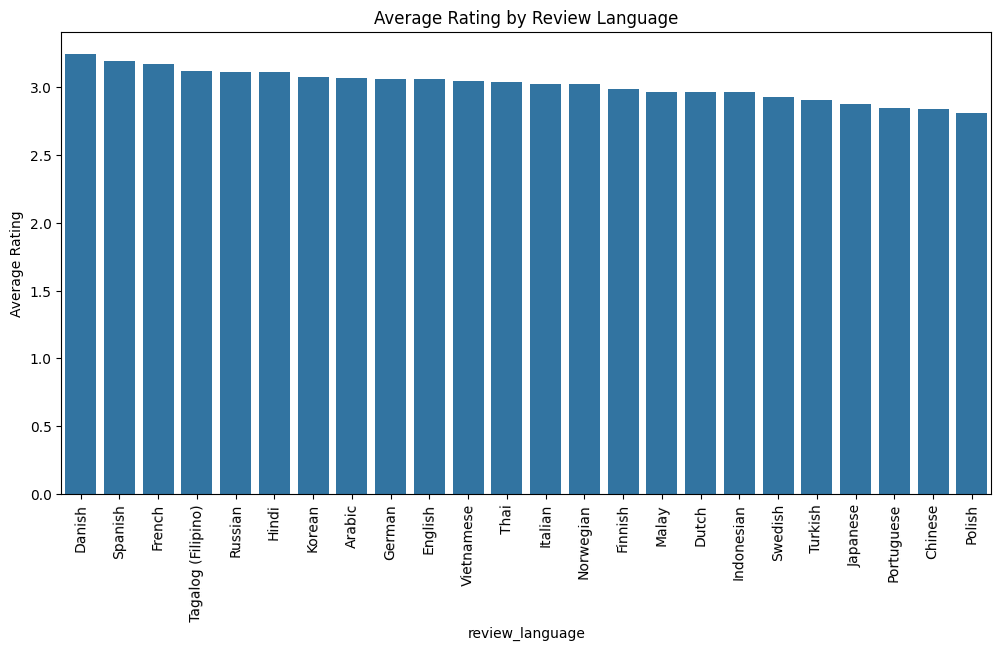

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=lang_counts.index, y=lang_counts['mean'])
plt.xticks(rotation=89)
plt.ylabel('Average Rating')
plt.title('Average Rating by Review Language')
plt.show()


Step 5: Count of reviews by language

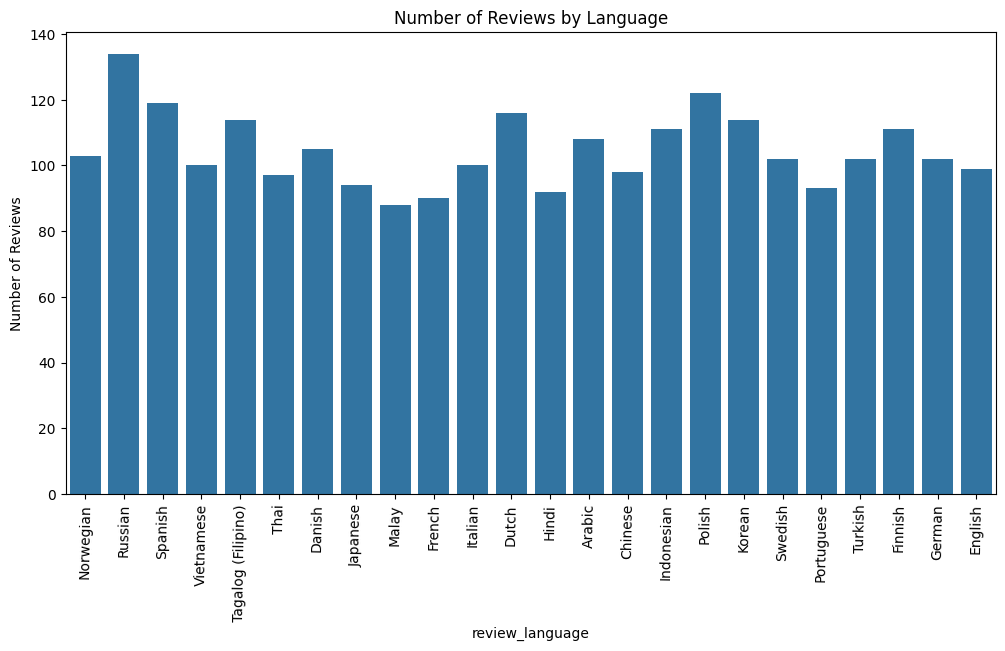

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='review_language', data=df)
plt.xticks(rotation=89)
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Language')
plt.show()


Step 6: Compare language vs verified purchase 

In [46]:
df.groupby(['review_language','verified_purchase'])['rating'].mean().unstack()


verified_purchase,False,True
review_language,,
Arabic,3.152622,3.038719
Chinese,3.035714,2.805983
Danish,3.210714,3.261441
Dutch,2.967857,2.966261
English,3.328571,2.987926
Finnish,2.628000,3.090698
French,2.995228,3.215068
German,3.159448,3.035490
Hindi,3.007143,3.132299


Languages where Verified users rated apps lower than Non-verified:

English → Non-verified = 3.33, Verified = 2.99 (biggest drop)

Polish → 3.05 → 2.73

Chinese → 3.04 → 2.81

Arabic → 3.15 → 3.04

German → 3.16 → 3.04

👉 Suggests stricter or more critical reviews when users actually purchased the app. and there are more False reviews

Languages where Verified users rated apps higher than Non-verified:

Danish → 3.21 → 3.26

French → 2.99 → 3.22

Hindi → 3.01 → 3.13

Korean → 2.86 → 3.14

Norwegian → 2.68 → 3.12

Tagalog (Filipino) → 3.04 → 3.15

Thai → 2.84 → 3.10
👉 Indicates higher trust/satisfaction when reviews are verified.

Languages with very little difference between groups:

Malay → 2.97 vs 2.97

Dutch → 2.97 vs 2.97

Spanish → 3.19 vs 3.20
👉 Verified status doesn’t affect these groups much.

Overall pattern:

In some cases (English, Polish, Chinese), verified users seem more demanding.

In others (French, Korean, Norwegian, Thai), verified users are more generous.

A few languages are neutral where verified status makes no difference.

👉 Conclusion:
The effect of verified_purchase on ratings depends on the language group.

English, Polish, Chinese → verified = more critical.

French, Korean, Norwegian, Thai → verified = more satisfied.

Malay, Dutch, Spanish → verified has almost no impact.

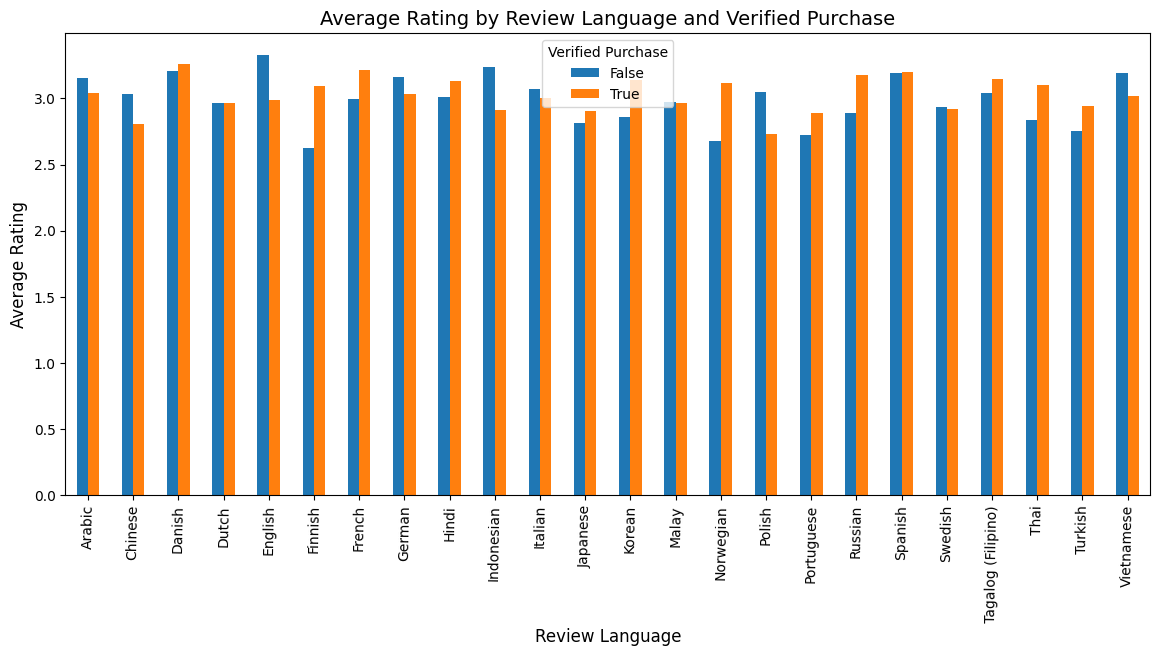

In [47]:
a = df.groupby(['review_language','verified_purchase'])['rating'].mean().unstack()
a.plot(kind='bar', figsize=(14,6))
plt.title("Average Rating by Review Language and Verified Purchase", fontsize=14)
plt.xlabel("Review Language", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.legend(title="Verified Purchase")
plt.xticks(rotation=89)
#plt.tight_layout()
plt.show()

### 3. Explain how app_version and review_date together can show app improvement or decline.

### 4. Do you think verified_purchase makes reviews more trustworthy? Justify your answer.

rified users can be more critical:

English: 3.33 → 2.99

Polish: 3.05 → 2.73

Chinese: 3.04 → 2.81

Verified users here gave lower ratings → stricter evaluation, highlighting real issues.

Verified users can be more positive:

French: 2.99 → 3.22

Korean: 2.86 → 3.14

Thai: 2.84 → 3.10

Verified users gave higher ratings → reflects actual satisfaction and trust in the product.

Neutral effect in some languages:

Malay, Dutch, Spanish → almost no difference between verified and non-verified reviews.

Think of it like voting:

If 1000 people vote on whether an app is good → the average opinion is very reliable.

If only 10 people vote → the average could swing wildly if just one person gives a really high or low rating.

So, for your verified vs non-verified comparison:

Spanish, Danish, Polish, Chinese → lots of reviews → the difference really means something.

Malay, French, Hindi → few reviews → difference might just be random noise, not a strong signal.

Basically: more data = more trust in the trend, less data = take it with caution.

### 5. How would you test whether device_type has an impact on app ratings?

 Already did in First Sub Question

### 6. If you had to find which age group is most satisfied, what steps would you follow?

Step 1: Group by age category and calculate average rating

In [48]:
df.groupby('age_cat')['rating'].mean().sort_values(ascending=False)

C:\Users\pushp\AppData\Local\Temp\ipykernel_3744\740370318.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_cat')['rating'].mean().sort_values(ascending=False)


age_cat
Super Seniors    3.053951
Teen             3.018739
Children         3.009486
Adult            3.003674
Seniors          2.999272
Name: rating, dtype: float64

*Highest average rating: Super Seniors (3.054) → they are the most satisfied.*

*Lowest average rating: Seniors (2.999) → slightly less satisfied.*

*The differences are small (~0.05), so overall satisfaction is fairly uniform across age groups.*

C:\Users\pushp\AppData\Local\Temp\ipykernel_3744\325774050.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby('age_cat')['rating'].mean().sort_values(ascending=False)


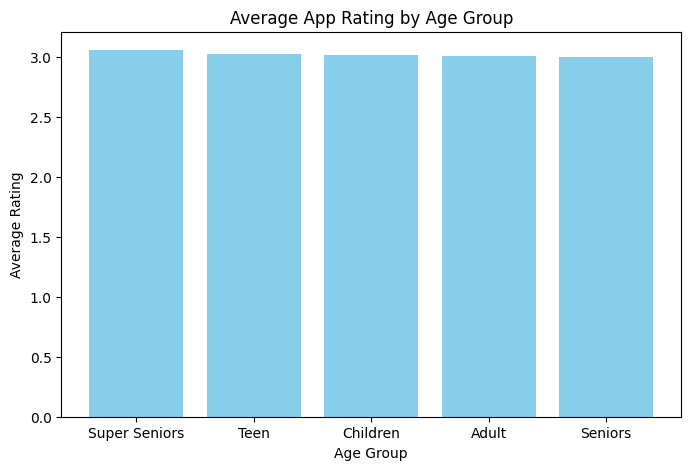

In [49]:
a = df.groupby('age_cat')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(a.index, a.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average App Rating by Age Group')
plt.show()

Step 2: Count reviews per age group

In [50]:
df['age_cat'].value_counts()

age_cat
Super Seniors    831
Seniors          761
Adult            441
Teen             298
Children         183
Name: count, dtype: int64

Super Seniors: Highest average rating and highest number of reviews → most satisfied & reliable.

Children: Low review count, so even if their average rating is close to others, it’s less statistically reliable.

#### .reset_index will convert series into a adataframe

C:\Users\pushp\AppData\Local\Temp\ipykernel_3744\4188562029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby('age_cat')['rating'].mean().reset_index()


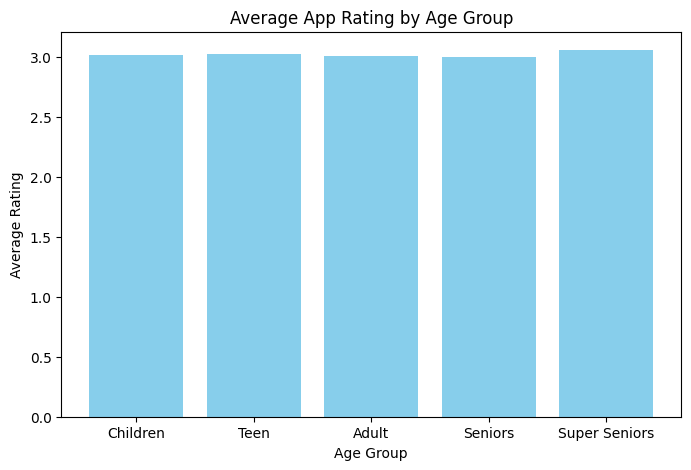

In [51]:
a = df.groupby('age_cat')['rating'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.bar(a['age_cat'], a['rating'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average App Rating by Age Group')
plt.show()


Conclusion:
Based on the dataset, Super Seniors are the most satisfied age group, with the highest average rating (3.054) and the largest number of reviews (831), making this conclusion reliable. Other age groups have slightly lower ratings, with Children having the fewest reviews, so their satisfaction is less statistically robust. Overall, satisfaction is fairly uniform across all age groups.

### 7. How would you identify fake or unreliable reviews using num_helpful_votes and review_text?

In [52]:
# Example: find reviews with 0 helpful votes
unhelpful_reviews = df[df['num_helpful_votes'] == 0]
unhelpful_reviews.shape


(5, 16)

In [53]:
# Calculate review length
df['review_length'] = df['review_text'].str.split().apply(len)

# Flag short reviews (e.g., <5 words) as suspicious
suspicious_reviews = df[df['review_length'] < 5]
suspicious_reviews.shape


(228, 17)

In [54]:
# Example combined filter
potential_fake = df[(df['num_helpful_votes'] == 0) & (df['review_length'] < 5)]
potential_fake

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version,age_cat,review_length
